<h1 style="color:#2bf0b5;"> <b>Neuroscience</b> HW2-3 - Lachin Naghashyar</h1>

---

<h2 style="color:#f06ff2;"> <b>PCA (principle components analysis)</b></h2>


PCA is an algorithm used for reducing the dimension of data. Assuming we have $d$ dimensions and $t$ training sets which we want to reduce the dimension to $k$, the steps are as follows:
- data normalization: we compute the mean of each feature, and then we replace each feature, f, with f minus its mean (this process is referred to as mean normalization, we can also perform feature scaling by dividing it by the standard deviation)
- calculate the covariance matrix: either by using np.cov or $X^T X$
- compute eigen vectors($V$) and eigen values of the covariance matrix. (we can use an inbuilt function in numpy for calculating covariance or use the SVD decomposition of X to get the eigenvectors of the covariance matrix)
- get the principal components using $P = X V$ (which is the same as $P = X V = USV^T V = US$. Here we use the first $k$ rows of $V$ so this way we have described this data set using the first k principal components. (the amount of variance captured is accessible using eigen values, so we can keep just the right amount of principal components for a desired amount of variance)

In [1]:
import numpy as np


def normalize_data(X):
    # normalization: (assuming we have training sets as rows)
    miu = np.reshape(np.average(X, axis=0), (1, X.shape[1]))
    std = np.reshape(np.std(X, axis=0), (1, X.shape[1]))
    return (X - miu) / std

In [2]:
def get_principle_components(X, k):
    u, s, vh = np.linalg.svd(X, full_matrices=False)
    v = vh[:k, :].transpose()
    # principle components, eigen vector, eigen values
    return X @ v, vh , s

<h3 style="color:#1061f2;"> Q1: on a 2 dimesional data set ($n = 2$ and $k = 1$) </h3>

In [3]:
from matplotlib import pyplot as plt

def pca1(X):
    X = normalize_data(X)
    plt.scatter(X[:, 0], X[:, 1])
    # calc covariance matrix
    # cov = np.cov(X, rowvar=False)
    # calc eigen vectors
    # eigen_values, eigen_vectors = np.linalg.eig(cov)
    P, V, S = get_principle_components(X, 1)
    # plot eigen vectors
    origin = np.array([[0, 0], [0, 0]])
    plt.quiver(*origin, V[:, 0], V[:, 1], color=['r', 'b'], scale=1)
    plt.show()
    print(P)

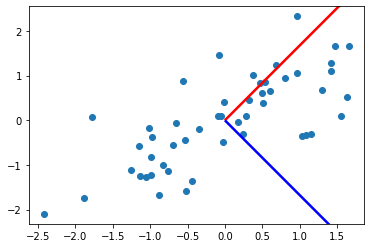

[[-1.49631261]
 [ 0.92218067]
 [-1.22439232]
 [-1.64386173]
 [-1.2732206 ]
 [ 0.97681976]
 [-1.26881187]
 [ 2.34148278]
 [ 0.02999141]
 [ 0.78171789]
 [ 0.6316777 ]
 [ 0.55280135]
 [ 0.0896816 ]
 [ 0.5258541 ]
 [-1.56415455]
 [ 1.91610366]
 [ 0.88679735]
 [-0.95607375]
 [ 2.32995679]
 [ 0.47793862]
 [ 2.21747195]
 [-0.38900633]
 [ 1.78482346]
 [-0.05175486]
 [-1.66512392]
 [-0.50813572]
 [ 1.23711018]
 [ 1.17198677]
 [-0.84221686]
 [ 0.00693174]
 [ 0.22794195]
 [ 1.51309518]
 [-1.33874082]
 [ 0.5925244 ]
 [-0.67907605]
 [ 1.35298   ]
 [-1.68749495]
 [ 1.39235931]
 [-2.55992598]
 [ 0.27850702]
 [ 0.97677692]
 [-0.88820006]
 [-1.29666127]
 [ 0.98966774]
 [-1.81272352]
 [ 0.27196356]
 [-3.19297722]
 [-1.21299151]
 [-0.36792871]
 [ 1.44264131]]


In [4]:

import scipy.io

data = scipy.io.loadmat('1d_pcadata.mat')
pca1(np.array(data["X"]))

<h3 style="color:#1061f2;"> Q2: on a 1024 dimesional </h3>


In [5]:
def pca2(X, k):
    X = normalize_data(X)
    return get_principle_components(X, k)

In [6]:
def plot_pics(X, a):
    # draws a^2 faces:
   pic = np.zeros((a*32, a*32))
   for i in range(a):
     for j in range(a):
        pic[i*32:i*32+32, j*32:j*32+32] = np.reshape(X[i+j, :], (32, 32), order='F')
   plt.imshow(pic, cmap=plt.get_cmap('gray'))
   plt.show()

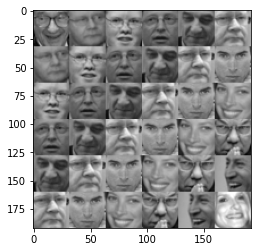

[1298.12368792  809.13162482  522.94135306  445.70111122  407.20152768]


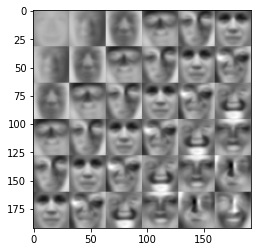

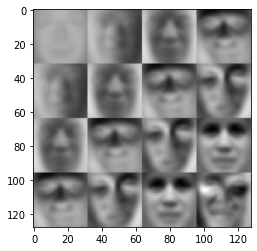

[86.70361984 53.4669772  43.03729459 37.81419277 32.92984848]


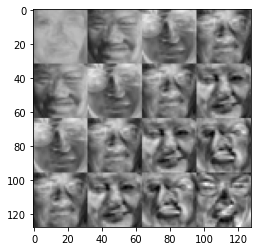

In [9]:
data = scipy.io.loadmat('faces.mat')
X = np.array(data["X"])
plot_pics(X, 6)

# assume we have k = 900
P, V, S = pca2(X, 900)
# the first 5 eigen value
print(S[0:5])
# plot the 36 eigen faces
plot_pics(V, 6)
# plot the 16 eigen faces
plot_pics(V, 4)

# if we use the first 20 pics:
# assume we have k = 900
P, V, S = pca2(X[0:20,:], 900)
print(S[0:5])
plot_pics(V, 4)

In the case of 20 pictures, the results are less blurry whereas in the one with 5000 samples, eigen faces are blurry, and it seems that this is because of the increase in the number of eigen vectors. When we are calculating the average on a large sample size, the results become fuzzy and less transparent.